<a href="https://colab.research.google.com/github/kyungmo90/Ubion-Python/blob/main/%EC%8B%A4%EC%8A%B5(2023-01-04).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
from pandas import *

# matplotlib는 시각화 라이브러리이고 pyplot은 matplotlib의 서브브패키지이다.
# pandas는 데이터 조작 및 분석용 라이브러리이고 DataFrame은 데이터분석에서 많이 사용하는 데이터 형태이다.
# numpy는 행렬을 다루기 위한 라이브러리이다.
# import * 은 라이브러리 전체를 불러오는 것이다.

In [37]:
from google.colab import drive
drive.mount('/content/drive')

# 구글드라이브의 드라이브라는 폴더를 마운트

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
df_LongTC = pd.read_csv("/content/drive/MyDrive/LongTC.CSV", encoding = "cp949")
df_LongTC

# 하드에 있는 엑셀파일중 하나를 구글 드라이브에 올리고 불러옴
# utf-8 오류가 떠서 cp949를 encoding해 한글 불러옴

,기관명,시도,시군구,기관유형,주소,전화번호,정원
0,청운노인요양원,서울특별시,1,노인요양시설(개정법),서울특별시 1 비봉길 76 (구기동),02-3217-0057,45
1,청운실버센터,서울특별시,1,노인요양공동생활가정,서울특별시 1 자하문로28길 29 (청운동),02-730-4966,9
2,인자인케어센터,서울특별시,1,노인요양시설(개정법),서울특별시 1 평창17길 26 (평창동),02-394-2234,42
3,평창동시니어센터,서울특별시,1,노인요양시설(개정법),서울특별시 1 평창15길 10 (평창동),02-391-7936,68
4,아름다운뜰안에 요양원,서울특별시,1,노인요양시설(개정법),서울특별시 1 평창21길 70 (평창동),02-396-0461,38
...,...,...,...,...,...,...,...
114,새솔요양원,서울특별시,6,노인요양공동생활가정,서울특별시 6 봉우재로 79 5층 (상봉동),02-435-7875,9
115,존엄케어노인전문요양원,서울특별시,6,노인요양공동생활가정,서울특별시 6 용마산로51길 1 2층 (면목동),02-491-0174,9
116,*(ABC)우림요양센터,서울특별시,6,노인요양공동생활가정,"서울특별시 6 용마산로 494 5층 (망우동, 상아프라자)",02-948-7701,9
117,늘푸른요양원,서울특별시,6,노인요양공동생활가정,서울특별시 6 용마산로 488 4층 (망우동),02-972-0410,9


BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7efdd9400820>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7efdd93df580>, <matplotlib.lines.Line2D object at 0x7efdd93df8e0>], 'caps': [<matplotlib.lines.Line2D object at 0x7efdd93dfc40>, <matplotlib.lines.Line2D object at 0x7efdd93dffa0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7efdd93df220>], 'medians': [<matplotlib.lines.Line2D object at 0x7efdd93e8340>], 'fliers': [<matplotlib.lines.Line2D object at 0x7efdd93e8640>], 'means': []})

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0, flags=flags)


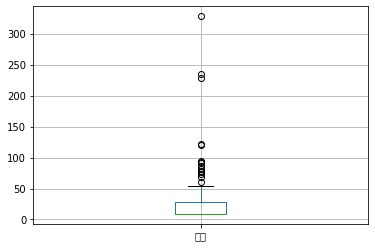

In [39]:
df_LongTC.boxplot(column="정원", return_type="both")

# 박스플롯으로 그래프를 보니 대부분 비슷한 정원으로 분포해 있으나 비정상적으로 큰 수치가 존재한다.

In [40]:
q1 = df_LongTC["정원"].quantile(q=0.25)
q3 = df_LongTC["정원"].quantile(q=0.75)
IQR = q3-q1
IQR

# 3분위와 1분위에 있는 값을 빼서 IQR이라는 변수에 입력하고 출력력

20.0

In [41]:
data_IQR = df_LongTC[(df_LongTC["정원"] < q3 + IQR * 1.5) & (df_LongTC["정원"] > q1 - IQR * 1.5)] #1.5는 약속
data_IQR

#1.5배수를 곱한 후 1분위와 3분위 사이에 있는 데이터들만 분류

,기관명,시도,시군구,기관유형,주소,전화번호,정원
0,청운노인요양원,서울특별시,1,노인요양시설(개정법),서울특별시 1 비봉길 76 (구기동),02-3217-0057,45
1,청운실버센터,서울특별시,1,노인요양공동생활가정,서울특별시 1 자하문로28길 29 (청운동),02-730-4966,9
2,인자인케어센터,서울특별시,1,노인요양시설(개정법),서울특별시 1 평창17길 26 (평창동),02-394-2234,42
4,아름다운뜰안에 요양원,서울특별시,1,노인요양시설(개정법),서울특별시 1 평창21길 70 (평창동),02-396-0461,38
5,서울여자간호대학교 휴먼캐슬,서울특별시,1,노인요양시설(개정법),서울특별시 1 평창길 318 (평창동),02-391-8464,38
...,...,...,...,...,...,...,...
114,새솔요양원,서울특별시,6,노인요양공동생활가정,서울특별시 6 봉우재로 79 5층 (상봉동),02-435-7875,9
115,존엄케어노인전문요양원,서울특별시,6,노인요양공동생활가정,서울특별시 6 용마산로51길 1 2층 (면목동),02-491-0174,9
116,*(ABC)우림요양센터,서울특별시,6,노인요양공동생활가정,"서울특별시 6 용마산로 494 5층 (망우동, 상아프라자)",02-948-7701,9
117,늘푸른요양원,서울특별시,6,노인요양공동생활가정,서울특별시 6 용마산로 488 4층 (망우동),02-972-0410,9


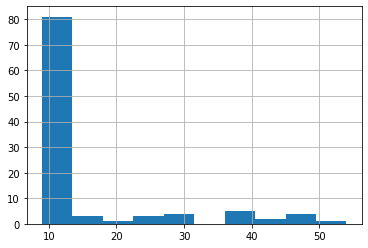

In [42]:
data_IQR["정원"].hist()

# IQR로 분류한 값들을 정원을 기준으로 막대그래프 출력

In [43]:
data_outlier = df_LongTC[(df_LongTC["정원"] > q3 + IQR * 1.5)]
data_outlier

# IQR에 1.5배 한 범위에서 벗어난 값들을 outlier로 출력력

,기관명,시도,시군구,기관유형,주소,전화번호,정원
3,평창동시니어센터,서울특별시,1,노인요양시설(개정법),서울특별시 1 평창15길 10 (평창동),02-391-7936,68
7,종로시니어스타워,서울특별시,1,노인요양시설(개정법),서울특별시 1 홍지문길 29 (홍지동),02-1877-5255,77
10,구립1노인요양센터,서울특별시,1,노인요양시설(개정법),서울특별시 1 필동로 96 (장충동2가),02-2277-3456,60
13,구립용산노인전문요양원,서울특별시,2,노인요양시설(개정법),서울특별시 2 효창원로93길 51 (효창동),02-715-5540,91
14,구립한남노인요양원,서울특별시,2,노인요양시설(개정법),서울특별시 2 독서당로 103 (한남동),02-790-8999,81
16,시립동부노인전문요양센터,서울특별시,3,"노인요양시설(개정법), 치매전담실가형1실, 치매전담실가형2실",서울특별시 3 마장로23길 12 (홍익동),02-3407-2700,328
27,광진한울촌노인요양시설,서울특별시,4,노인요양시설(개정법),서울특별시 4 군자로 79 (군자동),02-464-4511,93
30,워커힐실버타운,서울특별시,4,노인요양시설(개정법),서울특별시 4 워커힐로 93 (구의동),02-446-8911,122
37,워커힐케어센터1,서울특별시,4,노인요양시설(개정법),"서울특별시 4 아차산로 634 6, 7층 (광장동)",02-447-7118,78
41,사랑재 요양원,서울특별시,4,노인요양시설(개정법),서울특별시 4 자양로 188 (구의동),02-446-3356,74


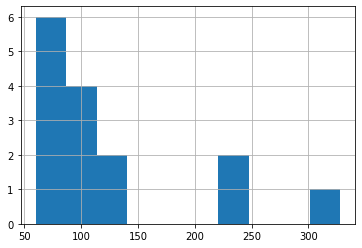

In [44]:
data_outlier["정원"].hist()

# 정원에서 이상치 정리

In [88]:
df = df_LongTC

#너무 길어서 변수 치환

In [102]:
y = df["시군구"]

# 시군구를 y로 치환

In [105]:
x = df[["시군구", "정원"]]

# 시군구와 정원원을 x로 치환

In [106]:
y = pd.DataFrame(y)

In [107]:
x = pd.DataFrame(x)

In [108]:
x

,시군구,정원
0,1,45
1,1,9
2,1,42
3,1,68
4,1,38
...,...,...
114,6,9
115,6,9
116,6,9
117,6,9


In [109]:
y

,시군구
0,1
1,1
2,1
3,1
4,1
...,...
114,6
115,6
116,6
117,6


In [110]:
xy_merge = y.merge(x)
xy_merge

# x,y를 합침

,시군구,정원
0,1,45
1,1,9
2,1,42
3,1,68
4,1,38
...,...,...
3830,6,9
3831,6,9
3832,6,9
3833,6,9


In [111]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 나눔고딕 설정

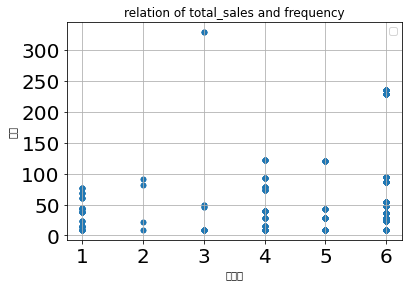

In [114]:
%matplotlib inline
xy_merge.plot.scatter(x = "시군구", y = "정원", title = "구 별 정원값")

plt.legend()
plt.grid()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

더이상 못하겠습니다.